In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib

In [6]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\student-scores.csv")

In [9]:
df = df.drop(['first_name', 'last_name', 'email', 'id'], axis=1)
df.gender = df.gender.map({"male": 0, "female": 1})
df.career_aspiration = df.career_aspiration.map({
    "Software Engineer": 0, "Business Owner": 1, "Unknown": 2, "Banker": 3,
    "Lawyer": 4, "Accountant": 5, "Doctor": 6, "Real Estate Developer": 7,
    "Stock Investor": 8, "Construction Engineer": 9, "Artist": 10, "Game Developer": 11,
    "Government Officer": 12, "Teacher": 13, "Designer": 14, "Scientist": 15, "Writer": 16
})

In [11]:
df['average_score'] = (df['math_score'] + df['history_score'] + df['physics_score'] + df['chemistry_score'] + df['biology_score'] + df['english_score'] + df['geography_score']) / 7

In [13]:
X = df.drop(['career_aspiration'], axis=1)
y = df['career_aspiration']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
joblib.dump(scaler, 'scaler3.pkl')

['scaler3.pkl']

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [23]:
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='f1_weighted')

In [24]:
best_model = grid_search.best_estimator_

In [25]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.43      0.51        76
           1       0.93      0.92      0.93        61
           2       0.80      0.49      0.61        65
           3       0.75      0.72      0.74        72
           4       0.81      0.88      0.84        72
           5       0.75      0.71      0.73        66
           6       0.79      0.94      0.86        66
           7       0.94      0.94      0.94        65
           8       0.90      0.97      0.93        64
           9       0.85      0.98      0.91        51
          10       0.98      1.00      0.99        59
          11       0.93      0.98      0.95        51
          12       0.90      1.00      0.95        57
          13       0.97      0.98      0.98        60
          14       0.90      0.96      0.93        56
          15       0.93      0.99      0.96        69
          16       0.91      0.97      0.94        61

    accuracy              

In [26]:
joblib.dump(best_model, 'Classifier_model3.pkl')

['Classifier_model3.pkl']

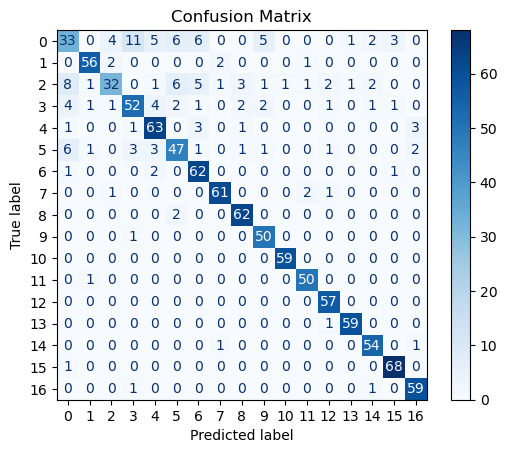

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# 4. Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()